<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Car_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d yasserh/auto-mpg-dataset
! unzip '/content/auto-mpg-dataset.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [26]:
ds_df = pd.read_csv("/content/data/auto-mpg.csv")

In [27]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [28]:
ds_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [31]:
ds_df["horsepower"] = ds_df["horsepower"].replace({"?": np.nan}).astype(float)

In [34]:
ds_df[list(ds_df)[:-1]].corr().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58,0.56
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35,-0.56
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.58
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29,0.21
model year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.56,-0.56,-0.61,-0.46,-0.58,0.21,0.18,1.00


In [39]:
ds_df["car name"].str.split(" ", expand=True)[0].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: 0, dtype: int64

In [40]:
ds_df["car co"] = ds_df["car name"].str.split(" ", expand=True)[0]

In [41]:
for brand in ["ford", "chevrolet", "plymouth"]:
  ds_df[brand] = (ds_df["car co"] == brand).astype(int)

In [42]:
ds_df[["ford", "chevrolet", "plymouth", "mpg"]].corr()

,ford,chevrolet,plymouth,mpg
ford,1.000000,-0.133426,-0.111421,-0.187628
chevrolet,-0.133426,1.000000,-0.101150,-0.135647
plymouth,-0.111421,-0.101150,1.000000,-0.067439
mpg,-0.187628,-0.135647,-0.067439,1.000000



# II. Preprocessing

In [43]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.10, random_state=1)

# III. Create Models

In [44]:
reg_models = setup(data=train_df, target="mpg", session_id=123,
                   ignore_features=["car name", "car co"])


,Description,Value
0,Session id,123
1,Target,mpg
2,Target type,Regression
3,Original data shape,"(358, 13)"
4,Transformed data shape,"(358, 11)"
5,Transformed train set shape,"(250, 11)"
6,Transformed test set shape,"(108, 11)"
7,Ignore features,2
8,Numeric features,10
9,Rows with missing values,1.7%


In [45]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.9999,7.7552,2.7461,0.8810,0.1089,0.0883,0.3460
lightgbm,Light Gradient Boosting Machine,2.0889,8.1729,2.8052,0.8760,0.1098,0.0917,0.3180
et,Extra Trees Regressor,2.0382,8.2245,2.8189,0.8735,0.1109,0.0900,0.3020
rf,Random Forest Regressor,2.0180,8.3212,2.8593,0.8730,0.1131,0.0894,0.3540
xgboost,Extreme Gradient Boosting,2.1432,9.1194,2.9902,0.8608,0.1153,0.0929,0.2220
ada,AdaBoost Regressor,2.1818,9.1257,2.9703,0.8603,0.1188,0.0980,0.2560
ridge,Ridge Regression,2.7161,12.1152,3.4380,0.8183,0.1585,0.1297,0.0720
lr,Linear Regression,2.7211,12.1383,3.4409,0.8180,0.1590,0.1300,0.9760
lar,Least Angle Regression,2.7263,12.1493,3.4431,0.8177,0.1594,0.1302,0.0580
br,Bayesian Ridge,2.6981,12.2208,3.4566,0.8166,0.1554,0.1278,0.0560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

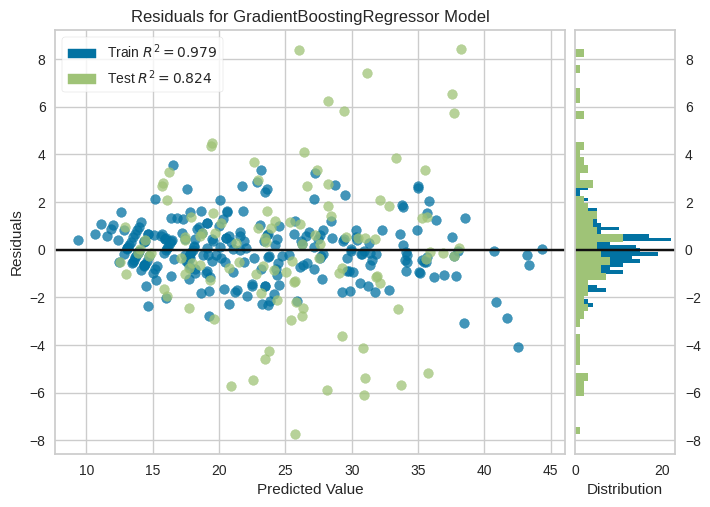

In [46]:
plot_model(best_model)